## Dependencies

In [1]:
from pretraining.autoencoder_loader import get_echonet_dataloader
from pretraining.train import train_autoencoder_3d
from pretraining.utils import visualize_random_video_from_loader,test_autoencoder, visualize_random_batch
from pretraining.autoencoder import MobileNetV3AutoEncoder3D
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
lr = 1e-3
num_epochs = 100
patience=5

data_path = r"C:\Projects\python\echoframe\data\EchoNet-Dynamic\EchoNet-Dynamic"
model_path_1 = r'../models/self_trained_encoder.pt'
log_path_1 = r'../logs/autoencoder.csv'
model_path_2 = r'../models/self_trained_encoder_masked.pt'
log_path_2 = r'../logs/masked_autoencoder.csv'

train_loader = get_echonet_dataloader(data_path=data_path)
val_loader = get_echonet_dataloader(data_path,
                                    batch_size=4,
                                    split="val")
test_loader = get_echonet_dataloader(data_path=data_path,split='test')

## Model 2 - masked AutoEncoder

In [2]:
# model_2 = MobileNetV3AutoEncoder3D()
# train_autoencoder_3d(model=model_2,
#                      train_loader=train_loader,
#                      valid_loader=val_loader,
#                      device=device,
#                      lr=lr,
#                      num_epochs=num_epochs,
#                      log_path=log_path_2,
#                      model_path=model_path_2,
#                      patience=patience,
#                      use_masked_loss=True)
# del model_2
# torch.cuda.empty_cache()


In [3]:
## Extract encoder weights
autoencoder_ckpt = torch.load(model_path_2, map_location="cpu")
encoder_state_dict = {
    k.replace("encoder.", ""): v
    for k, v in autoencoder_ckpt.items()
    if k.startswith("encoder.")
}
torch.save(encoder_state_dict, r"../models/pretrained_masked_encoder.pt")

## Model 1 - AutoEncoder

In [4]:
model_1 = MobileNetV3AutoEncoder3D()
# train_autoencoder_3d(model=model_1,
#                      train_loader=train_loader,
#                      valid_loader=val_loader,
#                      device=device,
#                      lr=lr,
#                      num_epochs=num_epochs,
#                      log_path=log_path_1,
#                      model_path=model_path_1,
#                      patience=patience)
# del model_1
# torch.cuda.empty_cache()


In [5]:
## Extract encoder weights
autoencoder_ckpt = torch.load(model_path_1, map_location="cpu")
encoder_state_dict = {
    k.replace("encoder.", ""): v
    for k, v in autoencoder_ckpt.items()
    if k.startswith("encoder.")
}
torch.save(encoder_state_dict, r"../models/pretrained_encoder.pt")

## Test

### Autoencoder

In [5]:
test_autoencoder(model=model_1,
                 test_loader=test_loader,
                 model_path=model_path_1,
                 device=device)

PSNR: 25.20 dB
SSIM: 0.7488
TDC:  0.003219


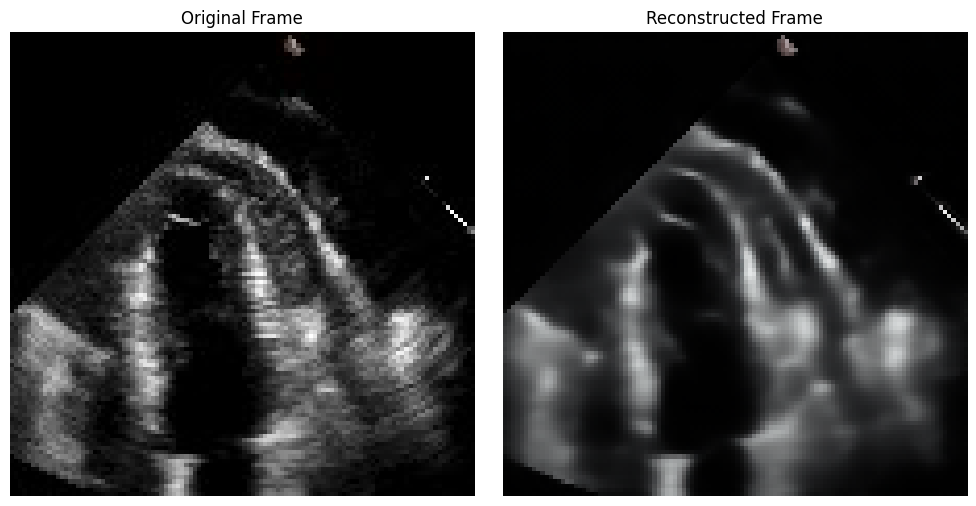

In [6]:
visualize_random_batch(model=model_1,
                       test_loader=test_loader,
                       model_path=model_path_1,
                       device=device)

### Masked - Autoencoder

In [7]:
test_autoencoder(model=model_1,
                 test_loader=test_loader,
                 model_path=model_path_2,
                 device=device)

PSNR: 23.05 dB
SSIM: 0.6389
TDC:  0.003286


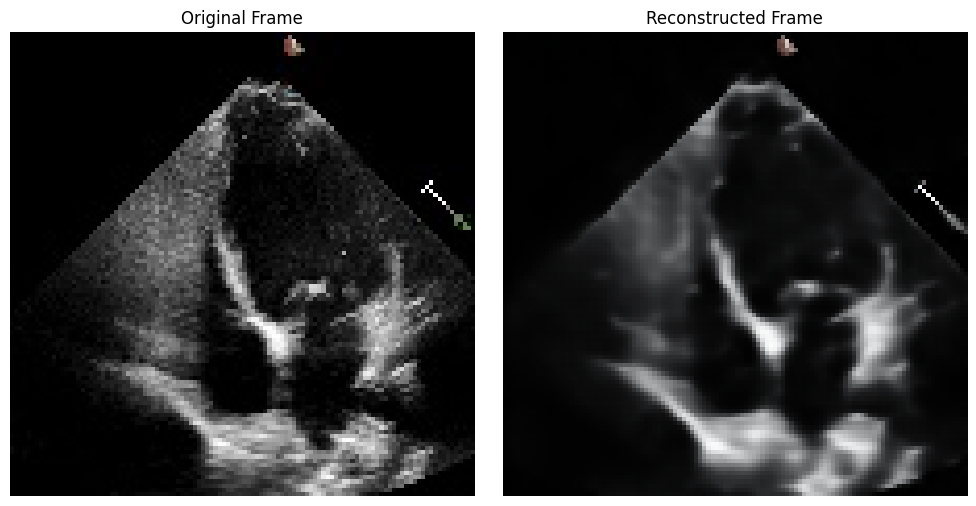

In [8]:
visualize_random_batch(model=model_1,
                       test_loader=test_loader,
                       model_path=model_path_2,
                       device=device)